# Planet : Amazon space

In [136]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import torchvision.transforms.functional as F

In [133]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(user_input), "I did not find the folder at, "+str(user_input)

## Loading the dataset

In [93]:
labels_dt = pd.read_csv(f'{data_folder}/train_labels.csv',dtype=str)
print(labels_dt.head())

  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


In [94]:
label_test =  labels_dt.iloc[0,1]
print(label_test)
print(type(label_test))

haze primary
<class 'str'>


In [95]:
print(label_test.split())

['haze', 'primary']


In [96]:
img_name_test = os.path.join(f'{data_folder}/train-jpg', labels_dt.iloc[5, 0])
img_name_test = f'{img_name_test}.jpg'
print(img_name_test)

../IPEO_Planet_project/train-jpg\train_5.jpg


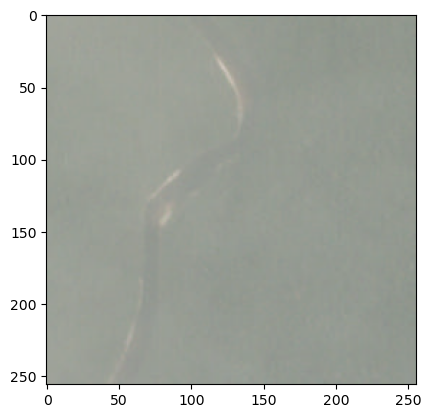

In [97]:
plt.figure()
image = io.imread(img_name_test)
plt.imshow(image)

### Custom made Class for dataset

In [120]:
class AmazonSpaces(Dataset):
    """Amazon aerial image dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with labels.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels.iloc[idx, 0])
        img_name = f'{img_name}.jpg'
        image = io.imread(img_name)
        labels = self.labels.iloc[idx, 1]
        labels = labels.split()
        sample = {'image': image, 'labels': labels}

        if self.transform:
            image_tr = self.transform(sample['image'])
            sample = {'image': image_tr, 'labels': labels}

        return sample

In [121]:
Amazon_dataset = AmazonSpaces(csv_file=f'{data_folder}/train_labels.csv',
                                    root_dir=f'{data_folder}/train-jpg')

### Having some fun with transforms

In [126]:
## Just testing some transforms and how to implement into dataset
Test_transforms = transforms.Compose([transforms.ToTensor(),transforms.CenterCrop(256),transforms.RandomErasing(p=0.2,scale = [0.1,0.1])])

In [127]:
transformed_dataset = AmazonSpaces(csv_file=f'{data_folder}/train_labels.csv',
                                    root_dir=f'{data_folder}/train-jpg', transform=Test_transforms)

0 torch.Size([3, 256, 256]) ['haze', 'primary']
1 torch.Size([3, 256, 256]) ['agriculture', 'clear', 'primary', 'water']
2 torch.Size([3, 256, 256]) ['clear', 'primary']
3 torch.Size([3, 256, 256]) ['clear', 'primary']


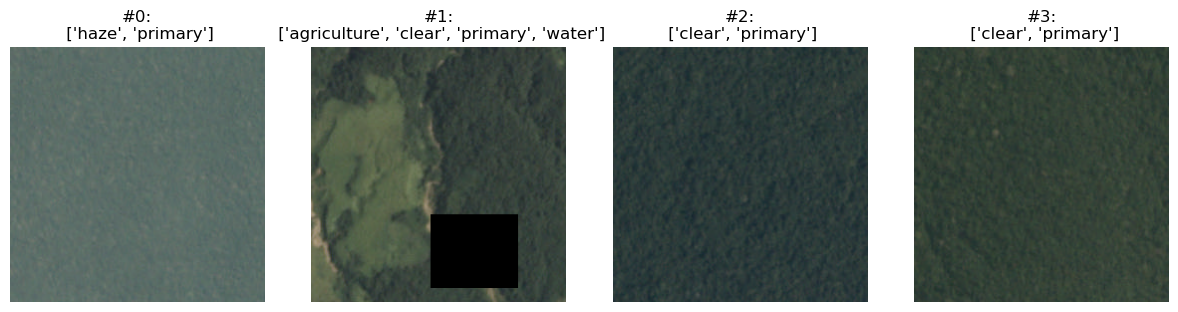

In [142]:
plt.figure(figsize=(12,10))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].shape, sample['labels'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    labels_i = sample['labels']
    ax.set_title(f'#{i}:\n {labels_i}')
    ax.axis('off')
    img = F.to_pil_image(sample['image'])
    plt.imshow(img)

    if i == 3:
        plt.show()
        break

## Into Dataloader

In [143]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

### Testing with plotting

In [146]:
# Helper function to show a batch
def show_image_batch(sample_batched):

    images_batch, labels = sample_batched['image'], sample_batched['labels']
    batch_size = len(images_batch)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    labels_i = sample['labels']
    ax.set_title(f'#{i}:\n {labels_i}')
    ax.axis('off')
    img = F.to_pil_image(sample['image'])
    plt.imshow(img)

    for i in range(batch_size):
        ax = plt.subplots(1,batch_size, i+1)
        img = F.to_pil_image(images_batch[i])
        plt.imshow(img)
        ax.set_title(f'#{i}:\n {labels[i]}')

In [148]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_image_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

RuntimeError: each element in list of batch should be of equal size